### Sobre o notebook

Esse notebook contém diversos desafios envolvendo os aprendizados de cada aula. É um notebook construído com o enunciado de cada desafio e com espaço para construir e executar suas soluções. Se for necessário adicionar mais células de código para solucionar o desafio, fique à vontade para acrescentar.

# Aula 1

Vamos praticar o conteúdo que foi apresentado na aula a partir de algumas atividades, porém usando um conjunto de dados diferente com dados de pacientes a serem diagnosticados com diabetes ou não.

### Desafio 1

Faça a leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y).

In [2]:
import pandas as pd

In [4]:
dados = pd.read_csv('.\\diabetes.csv')

In [6]:
dados.head()

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1


#### Realizando a divisão dos dados em variáveis explicativas e variável alvo (x e y)

In [9]:
x = dados.drop('diabetes', axis=1)
y = dados['diabetes']

### Desafio 2

Realize a divisão dos dados entre treino e teste.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify=y, random_state=5)

In [19]:
print(f'Quantidade total de registros: {len(dados)}')
print(f'Quantidade de registros no conjunto de treino: {len(x_treino)}')
print(f'Quantidade de registros no conjunto de teste: {len(x_teste)}')

Quantidade total de registros: 394
Quantidade de registros no conjunto de treino: 295
Quantidade de registros no conjunto de teste: 99


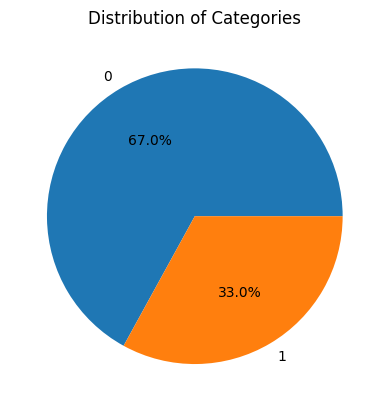

In [23]:
import matplotlib.pyplot as plt
y.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Distribution of Categories')
plt.show()


### Desafio 3

Crie 2 modelos utilizando os algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e avalie a acurácia de treino e teste, escolhendo valores para o parâmetro `max_depth` para os modelos não se especializarem demais no padrão dos dados de treino.

#### DecisionTreeClassifier

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
arvore = DecisionTreeClassifier(max_depth=4, random_state=5)

arvore.fit(x_treino, y_treino)

print(f'Acurácia nos dados de treino: {arvore.score(x_treino, y_treino)}')
print(f'Acuraácia nos dados de teste: {arvore.score(x_teste, y_teste)}')

Acurácia nos dados de treino: 0.8135593220338984
Acuraácia nos dados de teste: 0.696969696969697


#### RandomForestClassifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
random_forest = RandomForestClassifier(max_depth=4,random_state=5)

random_forest.fit(x_treino, y_treino)

print(f'Acurácia nos dados de treino: {random_forest.score(x_treino, y_treino)}')
print(f'Acuraácia nos dados de teste: {random_forest.score(x_teste, y_teste)}')

Acurácia nos dados de treino: 0.8440677966101695
Acuraácia nos dados de teste: 0.6565656565656566


### Desafio 4

Construa uma matriz de confusão para cada um dos modelos para avaliar o desempenho das previsões.

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#### Matiz de confusão DecisionTreeClassifier

In [46]:
#armezenando os dados previstos para os dados de validação
y_previsto = arvore.predict(x_treino)

#criando a matriz de confusão para verificar a quantidade de acertos e erros do modelo
# Comparando os dados previstos com os dados de validação (dados reais)
matriz_confusao = confusion_matrix(y_treino, y_previsto)
print(matriz_confusao)

[[178  20]
 [ 35  62]]


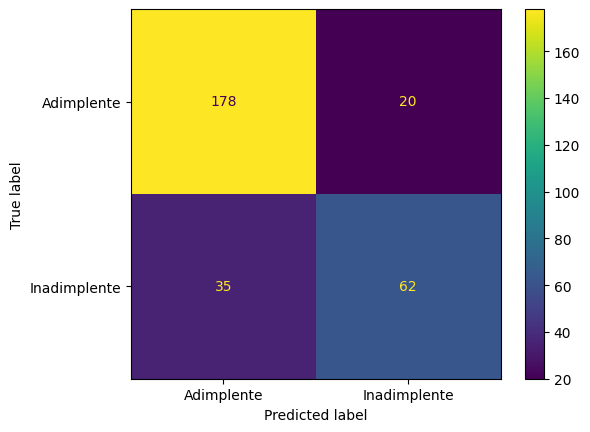

In [47]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot();

#### Matriz de confusão RandomForestClassifier

In [48]:
#armezenando os dados previstos para os dados de validação
y_previsto = random_forest.predict(x_treino)

#criando a matriz de confusão para verificar a quantidade de acertos e erros do modelo
# Comparando os dados previstos com os dados de validação (dados reais)
matriz_confusao = confusion_matrix(y_treino, y_previsto)
print(matriz_confusao)

[[185  13]
 [ 33  64]]


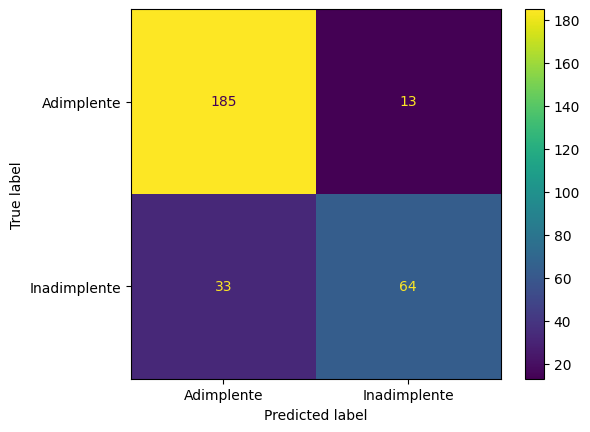

In [49]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot();

# Aula 2

### Desafio 1

Extraia as métricas acurácia, recall, precisão e F1-Score dos modelos de classificação gerados no desafio da aula 1.

### Desafio 2

Obtenha a curva ROC e a métrica AUC dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

### Desafio 3

Obtenha a curva precisão x recall e a métrica AP dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

### Desafio 4

Gere os relatórios de métricas dos modelos de classificação gerados no desafio da aula 1.

# Aula 3

### Desafio 1

Crie uma função para calcular o intervalo de confiança dos resultados de uma validação cruzada com 2 desvios padrão. A função precisa ter um parâmetro para receber uma lista com os desempenhos da validação cruzada e outro para apresentar o nome do modelo utilizado na validação cruzada. Exemplo de retorno da função:

> Intervalo de confiança ("nome do modelo"): ["valor mínimo do intervalo", "valor máximo do intervalo"]



### Desafio 2

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada com o método [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), usando 10 partes e embaralhando os dados antes da separação. Use o método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que não retorna o tempo de execução, apenas as métricas.

### Desafio 3

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada (`cross_val_score`) com o método [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), usando 10 partes e embaralhando os dados antes da separação e avaliando a métrica F1-Score.

### Desafio 4

Avalie o desempenho dos modelos utilizando a validação cruzada (`cross_val_score`) com o método [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

O método LeaveOneOut vai gerar um modelo para cada uma das linhas da base de dados, portanto a lista de resultados terá taxa de acerto apenas de 0 ou 1 para cada modelo. Dessa forma, extraia apenas a média do resultado, sem utilizar o intervalo de confiança.


# Aula 4

### Desafio 1

Verifique a proporção de dados da variável alvo do conjunto de dados de diabetes. Essa análise pode ser feita a partir da porcentagem de dados ou com a utilização de um gráfico de contagem para entender se há um desbalanceamento de dados.

### Desafio 2

Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o oversampling com [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

### Desafio 3

 Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o undersampling com [`Nearmiss`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) na sua versão 3, obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

### Desafio 4

Escolha o modelo que obteve o melhor desempenho ao comparar as estratégias de oversampling e undersampling e realize o teste do modelo nos dados de teste que foram separados no início dos desafios.